## Supervised Learning 

In [28]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA,NMF
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import numpy as np
import warnings
warnings.filterwarnings('ignore') 

#### Loading DataFrame (final dataframe from unsupervised learning notebook) 

In [29]:
df=pd.read_csv('/Users/dasha/Documents/Capstone_2_files/Machine_Learning/Final_Supervised_DataFrame.csv',index_col=0)

In [30]:
df.head()

,Glare Sensitivity_Importance,In an Enclosed Vehicle or Equipment_Context_5.0,Night Vision_Importance,"Operating Vehicles, Mechanized Devices, or Equipment_Importance","Outdoors, Exposed to Weather_Context_5.0","Outdoors, Under Cover_Context_5.0",Peripheral Vision_Importance,Sound Localization_Importance,Spatial Orientation_Importance,"Cramped Work Space, Awkward Positions_Context_5.0",...,Telephone_Context_1.0,Electronic Mail_Context_1.0,Freedom to Make Decisions_Context_1.0,Frequency of Conflict Situations_Context_1.0,Frequency of Decision Making_Context_1.0,Impact of Decisions on Co-workers or Company Results_Context_1.0,Letters and Memos_Context_1.0,Structured versus Unstructured Work_Context_2.0,Title,Cluster_ID
0,1.00,16.26,1.0,1.18,0.0,0.0,1.0,1.0,1.00,0.00,...,0.00,0.25,0.0,34.47,6.47,1.09,3.25,0.00,Accountants,2
1,1.88,2.15,1.0,1.30,0.0,0.0,1.0,1.0,1.00,0.00,...,2.77,2.74,0.0,17.80,3.81,1.07,39.05,22.20,Actors,1
2,1.00,0.00,1.0,1.06,0.0,0.0,1.0,1.0,1.00,0.00,...,0.00,0.00,0.0,15.62,0.00,0.00,0.00,0.00,Actuaries,2
3,1.00,0.00,1.0,1.40,0.0,0.0,1.0,1.0,1.25,0.00,...,0.00,5.46,0.0,20.39,6.94,6.80,0.00,11.96,Acupuncturists,1
4,1.00,3.70,1.0,2.00,0.0,0.0,1.0,1.0,1.00,14.81,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,Acute Care Nurses,3


Checking to see if the clusters are balanced...

In [31]:
df.Cluster_ID.value_counts()

1    212
2    153
0    145
5    134
7    103
6    103
3     61
4     55
Name: Cluster_ID, dtype: int64

The clusters are not exactly balance, but do not look terribly unbalanced.. Will leave this be for now..

Converting data to array forms for machine learning 

In [32]:
df_ml=df.drop('Title',axis=1)
X=df_ml.drop('Cluster_ID',axis=1).values
y=df_ml['Cluster_ID'].values
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.3)

Creating a pipleline with 3 components: option for scaling, dimensionality reduction, and the ML model. 

In [33]:
pipe=Pipeline([('scale',None),('red_dim',None),('ml_model',None)])

Setting the parameters for a grid search... using basic Logistic Regression Model. Including class_weight parameter as this might be helpful for balancing the clusters of the dataset 

In [140]:
params_logreg={\
               'scale':[MaxAbsScaler()],\
               'red_dim':[PCA(),NMF()],\
               'red_dim__n_components':[20,30,50],\
               'ml_model':[LogisticRegression()],\
               'ml_model__penalty':['l1'],\
               'ml_model__C':[0.001, 0.1, 1, 10, 100],\
               'ml_model__fit_intercept':[True,False],\
               'ml_model__class_weight':[None,'balanced'],\
               'ml_model__solver':['liblinear','saga']},\
{'scale':[MaxAbsScaler()],\
 'red_dim':[PCA(),NMF()],\
 'red_dim__n_components':[20,30,50],\
 'ml_model':[LogisticRegression()],\
 'ml_model__penalty':['l2'],\
 'ml_model__C':[0.001, 0.1, 1, 10, 100],\
 'ml_model__fit_intercept':[True,False],\
 'ml_model__class_weight':[None,'balanced'],\
 'ml_model__solver':['newton-cg','lbfgs','sag']}

Setting up the grid search...

In [141]:
gs_logreg=GridSearchCV(pipe,param_grid=params_logreg,cv=5,scoring='accuracy')
gs_logreg.fit(x_train,y_train)
df_results_logreg=pd.DataFrame(gs_logreg.best_params_,index=[0])
print(gs_logreg.best_score_)

0.8520710059171598


Accuracy of the is ~85%. The parameters for the best model are described below...

In [144]:
df_results_logreg.head()

,ml_model,ml_model__C,ml_model__class_weight,ml_model__fit_intercept,ml_model__penalty,ml_model__solver,red_dim,red_dim__n_components,scale
0,"LogisticRegression(C=100, class_weight='balanc...",100,balanced,False,l1,liblinear,"NMF(alpha=0.0, beta_loss='frobenius', init=Non...",20,MaxAbsScaler(copy=True)


Taking a look at the coefficients of the Logistic Regression Model 

In [151]:
df_logreg_coef=pd.DataFrame(gs_logreg.best_estimator_.named_steps['ml_model'].coef_)

In [152]:
df_logreg_coef

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-7.528684,6.283068,-6.161507,-20.149273,3.917255,8.580081,11.823955,19.491669,1.150713,-25.494973,11.423385,-33.767924,-6.782283,-4.594024,-4.591376,-1.330030,-6.030181,-8.335715,-1.304405,7.747143
1,-4.162159,-8.669818,-0.699417,5.148294,-3.632292,-0.195501,13.742313,-10.007881,-19.490917,-15.612130,9.108859,-11.504255,3.063279,-2.299561,2.219180,-6.457687,-2.245218,5.690290,3.390315,-5.787388
2,4.176318,-7.022210,-13.454730,-26.138513,-12.057078,26.663881,-37.097864,-18.411621,37.345193,1.440401,-10.660248,12.511290,-17.726693,-17.101811,-30.327371,-39.433155,-2.011133,-0.586408,-6.466280,10.626118
3,-48.473553,-56.970303,-35.753781,43.733895,19.978868,0.000000,0.000000,-30.408761,-14.429402,54.287022,-91.186240,0.000000,0.000000,26.673790,-1.379183,-45.849950,-6.095881,1.463085,-4.244901,27.309272
4,-27.990883,-9.401286,-64.115504,-12.871889,-56.940010,0.000000,-305.179444,-25.815399,-37.379301,67.044076,-15.221716,15.830295,65.719089,27.123490,53.953741,-32.707390,-104.307534,-28.756864,24.000061,-31.499643
5,2.052430,-2.680086,-24.716073,-6.081365,1.739245,-2.434748,-25.108212,1.296625,-18.302039,-21.465326,-11.376284,18.356873,16.621331,-6.107714,-21.185041,-0.215876,20.633919,-9.253953,-4.182476,-8.938542
6,-2.529275,-15.985487,8.710495,-9.134878,0.696175,16.581998,-20.071947,-8.480106,-39.900792,-0.247352,-10.936306,-27.485716,24.116392,14.905468,12.838645,15.593297,-29.520739,-8.882791,-8.457643,-11.302067
7,-2.765184,-7.167841,36.082034,-20.654693,3.524309,-16.697963,20.404188,9.384130,-20.808489,32.963131,4.736310,-9.135877,-11.474559,-5.294680,-35.287640,-3.682283,-17.620050,-5.739675,-2.499523,-10.312846


Plotting the coefficients..

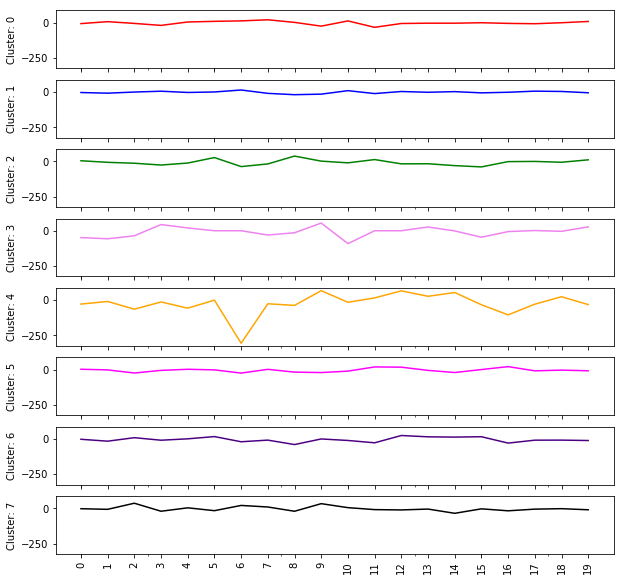

In [169]:
colors=['red','blue','green','violet','orange','magenta','indigo','black']
fig, axes = plt.subplots(8, 1,sharex='col',sharey='col')
for row in df_logreg_coef.index:
    df_row=df_logreg_coef.loc[row,:]
    plot=df_row.plot(ax=axes[row],figsize=(10,10),color=colors[row])
    plt.xticks(np.arange(0,20, step=1),rotation=90)
    plot.set_ylabel('Cluster: '+ str(row))

Setting up the parameters for a grid search for testing other, more advanced models: SGDClassifier, SVC, RandomForest, XGBClassifier and AdaBoostClassifier. 

In [40]:
params=\
{'scale':[MaxAbsScaler()],\
 'red_dim':[PCA(),NMF()],\
 'red_dim__n_components':[30,50,70],\
 'ml_model':[SGDClassifier()],\
 'ml_model__alpha':[.0001,.001,.01],\
 'ml_model__penalty':['l1','l2','elasticnet']},\
{'scale':[MaxAbsScaler()],\
 'red_dim':[PCA(),NMF()],\
 'red_dim__n_components':[30,50,70],\
 'ml_model':[SVC()],\
 'ml_model__gamma':['scale','auto'],\
 'ml_model__kernel':['linear','poly','rbf','sigmoid'],\
 'ml_model__C':[.001,.01,.1,1,10,100],\
 'ml_model__class_weight':[None,'balanced'],\
 'ml_model__decision_function_shape':['ovo','ovr']},\
{'scale':[MaxAbsScaler()],\
 'red_dim':[PCA(),NMF()],\
 'red_dim__n_components':[30,50,70],\
 'ml_model':[RandomForestClassifier(),XGBClassifier()],\
 'ml_model__n_estimators':[100,150],\
 'ml_model__max_depth':[5,10,15]},\
{'scale':[MaxAbsScaler()],\
 'red_dim':[PCA(),NMF()],\
 'ml_model':[AdaBoostClassifier()],\
 'ml_model__n_estimators':[100,150],\
 'red_dim__n_components':[30,50,70],\
 'ml_model__base_estimator':[RandomForestClassifier(),DecisionTreeClassifier()]}

Setting up the multi-model grid search ...

In [41]:
gs=GridSearchCV(pipe,param_grid=params,cv=5,scoring='accuracy')
gs.fit(x_train,y_train)
df_results=pd.DataFrame(gs.best_params_,index=[0])
print(gs.best_score_)

0.8801775147928994


The best model is SVC with accuracy of ~88 %. The specific parameters are listed below...

In [42]:
df_results.head()

,ml_model,ml_model__C,ml_model__class_weight,ml_model__decision_function_shape,ml_model__gamma,ml_model__kernel,red_dim,red_dim__n_components,scale
0,"SVC(C=100, cache_size=200, class_weight='balan...",100,balanced,ovr,scale,rbf,"PCA(copy=True, iterated_power='auto', n_compon...",30,MaxAbsScaler(copy=True)


In [43]:
y_pred=gs.predict(x_test)

The crosstab for SVC predictions...

In [44]:
df_crosstab=pd.DataFrame({'y_true':y_test,'y_pred':y_pred})
pd.crosstab(df_crosstab['y_true'],df_crosstab['y_pred'])

y_pred,0,1,2,3,4,5,6,7
y_true,,,,,,,,
0,45,1,0,0,3,1,2,1
1,0,42,4,0,0,2,0,1
2,0,1,42,0,0,0,0,2
3,0,1,0,15,0,0,1,0
4,1,0,0,0,23,0,0,0
5,0,2,1,0,1,32,1,0
6,2,0,0,0,0,0,26,0
7,0,4,1,0,0,2,0,30


The crosstab table seems to portray that the test set classification labels are well centered around the actual cluster labels 

In [45]:
print(classification_report(df_crosstab['y_true'],df_crosstab['y_pred']))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        53
           1       0.82      0.86      0.84        49
           2       0.88      0.93      0.90        45
           3       1.00      0.88      0.94        17
           4       0.85      0.96      0.90        24
           5       0.86      0.86      0.86        37
           6       0.87      0.93      0.90        28
           7       0.88      0.81      0.85        37

   micro avg       0.88      0.88      0.88       290
   macro avg       0.89      0.89      0.89       290
weighted avg       0.88      0.88      0.88       290

